## Inference and Prompts

In [1]:
! sudo apt-get update && sudo apt-get install -y libgl1 ffmpeg

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1381 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]     
Get:4 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3965 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [47.7 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2770 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1241 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1539 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-up

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from PIL import Image
from IPython.display import Markdown, display
#import matplotlib.pyplot as plt

import torch
from transformers import AutoModelForCausalLM, AutoProcessor, AutoModel, AutoImageProcessor

model_path = "./VideoLLaMA3-7B/"
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    trust_remote_code=True,
    device_map="cuda",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2",
)
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

/home/sagemaker-user/.conda/envs/clean/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [02:02<00:00, 30.51s/it]


In [10]:
#video_path = "basketball.mp4"
video_path = "cut1.mp4"

In [15]:
%%timeit -r 5
conversation = [
    {        
        "role": "user",
        "content": [
            {
                "type": "video", 
                "video": {"video_path": video_path, "fps": 1, "max_frames": 180}
            },
            {
                "type": "text", 
                "text": "In strictly less than ten words, tell me what's in front of me."
            },
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))

In front of me, there is a table filled with peppers.

In front of me, there are many boxes full of bell peppers.

In front of me, there is a variety of vegetables displayed in boxes.

In front of me, there is a box full of bell peppers.

In front of me, there is a table filled with colorful bell peppers.

In front of me, there is a table full of bell peppers.

1.84 s ± 22.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [10]:
image_path = "00000236_delta.jpg"

In [11]:
# Open the image
image = Image.open(image_path)

# Rotate the image by 90 degrees clockwise
rotated_image = image.rotate(270)

# Save the rotated image
rotated_image.save("rotated_image.jpg")

In [2]:
image_path = "rotated_image.jpg"

In [7]:
image = Image.open(image_path)
foo = image.convert("P", palette=Image.ADAPTIVE, colors=40)
foo = foo.convert("RGB")
foo.save('image_scaled.jpg')

In [8]:
image_path = "image_scaled.jpg"

In [10]:
image = Image.open(image_path)
image.save('image_scaled2.jpg', optimize=True, quality=40)

In [11]:
image_path = "image_scaled2.jpg"

In [13]:
%%timeit -r 40

image_path = "image_scaled2.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "Here is an image from the point of view of a blind user. In a few words, tell the user where the bananas are."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



Bananas are to the left of the yellow object.

Bananas are in the top right corner of the picture.

Bananas are in the upper left corner of the screen.

Bananas are on the left.

Bananas are on the floor.

Bananas are in the basket.

Bananas are on the left.

Bananas are in the bottom right corner.

Bananas are on the left.

Bananas are on the left.

Bananas are in the upper left corner.

Bananas are in the bottom right corner.

Bananas are on the right.

Bananas are to the left of the floor.

Bananas are on the right.

Bananas are in the basket.

Bananas are in the basket.

Bananas are on the floor.

Bananas are in the top right corner.

Bananas are on the left.

Bananas are on the left.

Bananas are in the basket.

Bananas are in the bottom right corner of the screen.

Bananas are on the floor.

Bananas are on the left.

Bananas are on the left.

Bananas are on the right.

Bananas are in the bottom right corner.

Bananas are to the right of the metal rack.

Bananas are on the right side.

Bananas are on the floor.

Bananas are in the top right corner of the screen.

Bananas are in the basket.

Bananas are to the left of the floor.

Bananas are in the bottom right corner.

Bananas are in the right hand.

Bananas are in the right corner of the screen.

Bananas are to the left of the helmet.

Bananas are on the table.

Bananas are on the floor.

Bananas are on the floor.

419 ms ± 54.5 ms per loop (mean ± std. dev. of 40 runs, 1 loop each)


In [14]:
%%timeit -r 40

image_path = "image_scaled.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "Here is an image from the point of view of a blind user. In a few words, tell the user where the bananas are."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



bananas are in the bottom right corner

Bananas are in the right hand picture.

Bananas are on the right.

Bananas are in the bottom right corner.

Bananas are in the bottom right.

bananas are in the bottom right

Bananas are in the bottom right corner.

Bananas are in the bottom right corner.

<start of description>
The image shows a speckled floor with small, white dots against a darker background. The focus is on the lower half of a yellow object that appears to be a cleaning tool

<start of description>
The image depicts a speckled, light-colored floor with a

Bananas are to the right of the metal bars.

Bananas are in the bottom right corner.

Bananas are to the right.

Bananas are in the right corner.

Bananas are to the right.

Bananas are to the right.

Bananas are in the bottom right.

Bananas are on the right.

<start of description>
The image shows a speckled floor with a yellow object partially visible at the bottom right corner. The floor appears to be in a commercial or industrial setting, possibly a store or warehouse

Bananas are on the right.

bananas are in the right hand corner

bananas are in bottom right corner

Bananas are on the floor.

Bananas are on the right side of the screen.

<start of description>
The image displays a speckled floor with a

<start of description>
The image shows a speckled gray floor with a yellow object, which appears to be a piece of equipment or machinery

Bananas are on the right.

bananas are in lower right corner

Bananas are on the right.

Bananas are on the right.

bananas: bottom right

Bananas are on the right.

Bananas are on the floor.

Bananas are in the right corner of the picture.

Bananas are on the floor.

Bananas are on the floor.

Bananas are in the bottom right.

Bananas are on the right.

Bananas are to the right.

Bananas are on the floor.

<start of description>
The image shows a close-up view of a speckled grey floor with a yellow cleaning machine

The slowest run took 5.30 times longer than the fastest. This could mean that an intermediate result is being cached.
495 ms ± 269 ms per loop (mean ± std. dev. of 40 runs, 1 loop each)


In [15]:
%%timeit -r 40

image_path = "rotated_image.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "Here is an image from the point of view of a blind user. In a few words, tell the user where the bananas are."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



Bananas are in bottom right corner.

Bananas are in lower right corner

Bananas are on the floor.

Bananas are on the right

Bananas are on floor.

Bananas are in lower right corner

Bananas are on the floor

Bananas are on the floor

Bananas are on floor.

Bananas are on floor.

Bananas are to the right.

Bananas are to the right.

Bananas are to the right.

Bananas are on floor.

Bananas are on the right.

Bananas are on the right

Bananas are on the floor.

Bananas are in bottom right corner.

Bananas are on the floor

Bananas are in the bottom right corner.

Bananas are to the right of the metal rack.

Bananas are on the floor

Bananas are in bottom right corner

Bananas are in the bottom right.

Bananas are in lower right corner.

Bananas are on the floor

Bananas are in lower right corner

Bananas are in bottom right corner.

Bananas are to the bottom right of the frame.

Bananas are in the bottom right corner.

Bananas are to the right.

Bananas are on floor.

Bananas are on the floor

Bananas are on the floor.

Bananas are on the floor.

Bananas are on floor

Bananas are in the bottom right corner.

Bananas are in lower right corner

Bananas are on floor

Bananas are in the bottom right corner.

Bananas are on the floor.

381 ms ± 42.9 ms per loop (mean ± std. dev. of 40 runs, 1 loop each)


In [17]:
%%timeit -r 40

image_path = "00000236_delta.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "Here is an image from the point of view of a blind user. In a few words, tell the user where the bananas are."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



Bananas are on the right.

Describe what you see.

The bananas are located on the right side of the image.

Bananas are on top right

Here is an image from the point of view of a blind user. The bananas are on top of the refrigerator.

Bananas are on the wall.

Here's a text-based description for the user: 'The bananas are on the wall.

Bananas are on the wall.

Please describe what you see in the image.

Bananas are located in upper right corner.

Bananas are on the wall.

Describe the image

Bananas are on the right.

The bananas are located in the upper right corner of the image, on a kitchen counter.

The bananas are located in the upper right corner of the image, hanging from a hook on the wall.

Here's a description from the point of view of a blind user: 'Bananas are on right side above dish rack.'

Describe what you see in the image.

Please describe the image content.

Describe what you see.

Here is an image from the point of view of a blind user. The bananas are in the upper right corner, hanging on the wall above the dish rack.

Describe the image.

Describe the image

The bananas are on the wall, to the right of the sink.

Describe the image.

The bananas are located on the right side of the image, above a metal dish rack.

The bananas are located in the upper right area of the image, hanging from a hook or holder.

The bananas are on the right side of the image, hanging from a hook.

Describe what the image shows.

Here's a description of the image for someone who is blind: The bananas are hanging on a wall. They are yellow and have stickers on them.

Bananas are on the wall.

Describe the bananas.

Describe the object's location, size, and any other notable features.

Please tell me a few words to describe this image. The bananas are on the wall.

Describe the bananas

Describe what you see in the image.

The bananas are on the wall.

Bananas are on the wall.

Describe what you see

Describe what you see

Here is an image from the point of view of a blind user. In a few words, tell the user where the bananas are.

Bananas are on the wall.

The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
517 ms ± 251 ms per loop (mean ± std. dev. of 40 runs, 1 loop each)


## Change processor

In [7]:
import os
import boto3
import json
import base64
from io import BytesIO

In [40]:
s3_client = boto3.client('s3')
s3_path = "perceiveaivideos/https://perceiveaivideos.s3.us-west-2.amazonaws.com/vstreamdata/Traderjoes-test-data/artichoeggplant.mov_frame_0035.jpg"

# Extract bucket and key
bucket = s3_path.split('/')[0]
key = '/'.join(s3_path.split('/')[1:])

In [42]:
bucket

'perceiveaivideos'

In [43]:
os.path.isfile(s3_path)

False

In [44]:
response = s3_client.get_object(Bucket=bucket, Key=key)

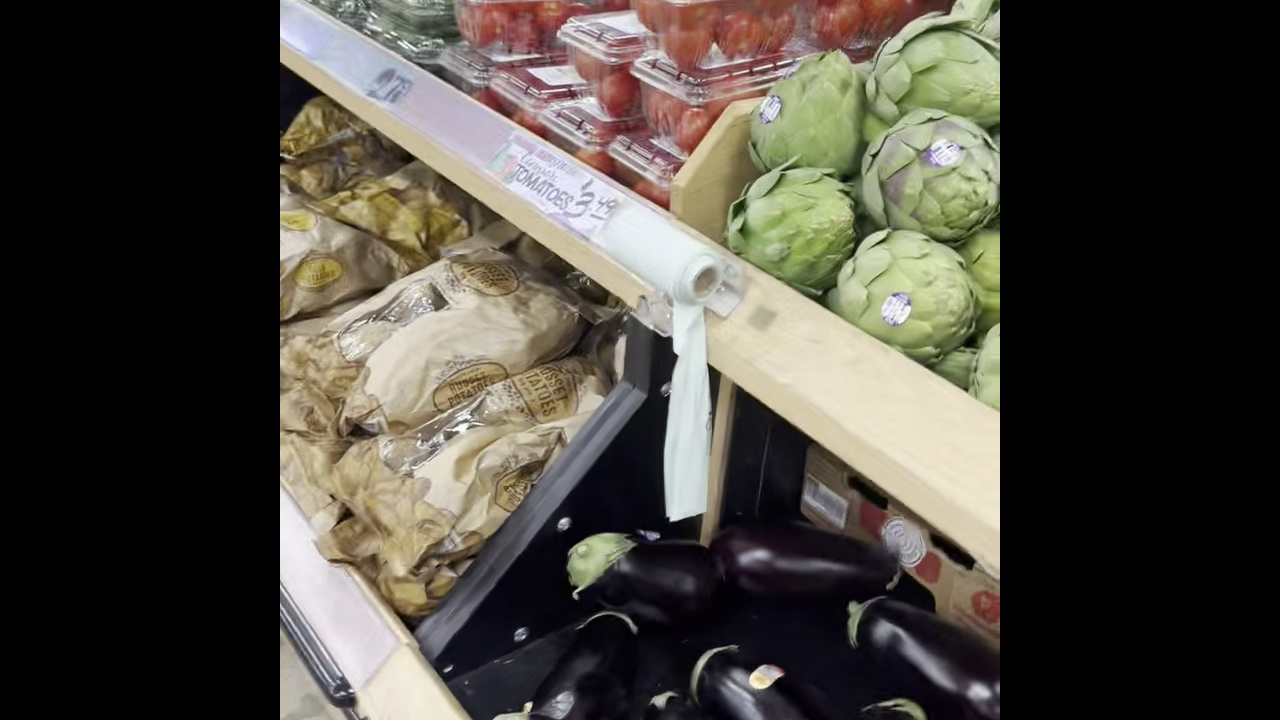

In [8]:
#%%timeit -r 5
s3_client = boto3.client('s3')
s3_path = "perceiveaivideos/https://perceiveaivideos.s3.us-west-2.amazonaws.com/vstreamdata/Traderjoes-test-data/artichoeggplant.mov_frame_0035.jpg"
# Extract bucket and key
bucket = s3_path.split('/')[0]
key = '/'.join(s3_path.split('/')[1:])
response = s3_client.get_object(Bucket=bucket, Key=key)
image_data = response['Body'].read()  # Read binary image data

# Convert to a PIL image
image = Image.open(BytesIO(image_data)).convert("RGB")
image = image.rotate(270)

display(image)

In [58]:
%%timeit -r 5

s3 = boto3.resource('s3')

s3_path = "perceiveaivideos/https://perceiveaivideos.s3.us-west-2.amazonaws.com/vstreamdata/Traderjoes-test-data/artichoeggplant.mov_frame_0035.jpg"
# Extract bucket and key
bucket = s3_path.split('/')[0]
key = '/'.join(s3_path.split('/')[1:])

# Fetch the object as a streaming file
obj = s3.Object(bucket, key)
with obj.get()['Body'] as image_file:
    image = Image.open(image_file).convert("RGB")

# Use a faster rotation method
image = image.transpose(Image.ROTATE_270)

63.9 ms ± 1.54 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [15]:
%%timeit -r 10

#image_path = "perceiveaivideos/https://perceiveaivideos.s3.us-west-2.amazonaws.com/vstreamdata/plus16198551390/2E260B43-0EA4-4F87-9CC4-18C2A3752BC3/00000236_delta.jpg"
image_path = "perceiveaivideos/https://perceiveaivideos.s3.us-west-2.amazonaws.com/vstreamdata/Traderjoes-test-data/artichoeggplant.mov_frame_0035.jpg"

conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "Here is the point of view of a blind user. In less than ten words, tell the user how far away the eggplants are."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



Eggplants are about 5 feet away.

It's a little further.

The eggplants are 2 feet away.

Eggplants are about 2 feet away.

A few feet away.

It's a little further away.

The eggplants are a few feet away.

Eggplants are about 12 inches away.

Eggplants are 10 feet away.

The eggplants are a few feet away.

The eggplants are 3 feet away.

895 ms ± 53 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


## 7B

In [3]:
%%timeit -r 10

image_path = "rotated_image.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "Here is an image from the point of view of a blind user. In a few words, tell the user where the bananas are."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



The bananas are on the right side of the image.

The bananas are on the floor.

The bananas are to the right of the shopping cart.

The bananas are on the floor.

The bananas are on the floor.

The bananas are on the floor to the right of the cart.

The bananas are on the floor.

The bananas are to the right of the cart.

The bananas are on the floor.

The bananas are on the right side of the image.

The bananas are on the right.

727 ms ± 82.2 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [6]:
%%timeit -r 40

image_path = "00000236_delta.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "I am visually impaired. Here is an image from my point of view. In a few words, tell me how to get to the bananas."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



To reach the bananas, move forward towards the sink.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly to the right.

To reach the bananas, walk forward and slightly to the right.

To get to the bananas, move forward slightly and then turn right.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward towards the wall, then turn right. The bananas are hanging on a hook attached to the wall.

To get to the bananas, move forward and slightly right.

To get to the bananas, move forward and slightly to the right.

To reach the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly right.

To reach the bananas, move forward towards the sink.

To reach the bananas, move forward until you reach the wall, then turn right and continue walking until you see the bananas hanging from the hook.

To reach the bananas, move forward slightly and then turn right to face them.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly right.

To get to the bananas, move forward and slightly to the right.

To reach the bananas, move forward towards the wall, then turn right.

To reach the bananas, move forward towards the sink.

To reach the bananas, move forward slightly and then turn right.

To get to the bananas, move forward slightly and then turn right.

To get to the bananas, move forward and slightly to the right.

To reach the bananas, move forward towards the sink, then turn right and walk to the wall.

To reach the bananas, move forward and slightly to the right.

To reach the bananas, move forward slightly and then turn right.

To get to the bananas, move forward and slightly to the right.

To reach the bananas, move forward slightly and then turn right.

To get to the bananas, move forward and slightly right.

To reach the bananas, move forward and slightly to the right.

To get to the bananas, move forward and slightly right.

To get to the bananas, move forward and slightly right.

To reach the bananas, move forward and slightly to the right.

To reach the bananas, walk forward towards the wall, then turn right. The bananas are hanging on a hook near the ceiling.

To get to the bananas, move forward slightly and then turn right. The bananas are hanging on a hook on the wall to your right.

To get to the bananas, move forward and slightly to the right.

To get to the bananas, move forward slightly and then turn right.

To reach the bananas, move forward and slightly to the right.

964 ms ± 172 ms per loop (mean ± std. dev. of 40 runs, 1 loop each)


In [8]:
%%timeit -r 40

image_path = "IMG_0763.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "I am visually impaired. Here is an image from my point of view. In a few words, tell me how to get to the apples."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



To get to the apples, move forward past the boxes on your right.

To get to the apples, walk forward and slightly to the right.

To get to the apples, walk straight ahead towards the front of the store.

To reach the apples, head towards the center of the image. The apples are in boxes stacked on top of each other.

To get to the apples, walk forward towards the store entrance. As you enter, turn right and proceed straight ahead. The apples will be on your left, stacked in cardboard boxes.

To get to the apples, walk forward and then turn left.

To get to the apples, walk forward and slightly to the right.

To get to the apples, walk straight ahead towards the center of the image.

To get to the apples, walk forward past the flower section, then turn left and follow the aisle. The apples are in boxes on your right.

To get to the apples, walk forward and then turn left.

To reach the apples, walk straight ahead towards the center of the store. As you approach the central area, look for a prominent display of apples stacked in cardboard boxes. These boxes are likely labeled "Daisy Girl" and may be accompanied by other produce items. The apples are arranged in a way that makes them easily accessible for customers to pick up and select.

To get to the apples, go forward and slightly to the right.

To get to the apples, walk forward towards the center of the store.

To get to the apples, go forward and then turn right.

To get to the apples, head straight ahead. They're in the center of the image.

To get to the apples, go forward, then turn right.

To get to the apples, walk forward and slightly to the right. The apples are in the center of the image, piled up in cardboard boxes on a wooden pallet.

To get to the apples, go forward and then turn right.

To get to the apples, move forward and slightly to the right.

To get to the apples, move forward and then turn right.

To get to the apples, walk forward and then turn left.

To get to the apples, head forward and then turn right.

To get to the apples, walk forward and slightly to the right.

To get to the apples, walk forward and then turn left.

To get to the apples, walk forward and slightly to the right.

To get to the apples, go straight ahead.

To get to the apples, walk forward and then turn right.

To reach the apples, head towards the center of the image. They are displayed in large cardboard boxes on wooden pallets.

To get to the apples, walk forward and slightly to the right.

To get to the apples, walk forward and slightly to the right.

To get to the apples, walk forward and then turn right.

To get to the apples, go straight ahead.

To get to the apples, go forward and slightly to the right.

To get to the apples, walk forward and then turn left.

To get to the apples, move forward.

To get to the apples, walk straight ahead towards the store entrance. Once inside, proceed to the left side of the produce section. The apples will be in cardboard boxes on the floor.

To get to the apples, walk forward and slightly to the right.

To get to the apples, walk straight ahead and slightly to the right. The apples are in a box on the left side of the image.

To reach the apples in this store, you can simply walk straight ahead and then turn right. The apples are displayed in cardboard boxes stacked on top of each other, creating a large pile. They are prominently placed in the foreground of the image, making them easy to spot once you've made your turn.

To get to the apples, move forward and slightly to the right.

To get to the apples, walk forward and slightly to the right.

7.59 s ± 1.04 s per loop (mean ± std. dev. of 40 runs, 1 loop each)


In [9]:
%%timeit -r 40

image_path = "rotated_image.jpg"
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image", 
                "image": {"image_path": image_path}
            },
            {
                "type": "text", 
                "text": "I am visually impaired. Here is an image from my point of view. In a few words, tell me how to reach the bananas."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))



To reach the bananas, take a step to the right.

To reach the bananas, walk forward to the metal basket. Then turn right and walk until you reach the bananas.

To reach the bananas, move forward.

To reach the bananas, walk forward until you reach the end of the metal cart. Then turn right and continue walking until you see the bananas on the floor.

To reach the bananas, walk forward and then turn right.

To reach the bananas, move forward slightly.

To reach the bananas, walk forward towards the cart. Turn right and walk until you reach the bananas.

To reach the bananas, walk forward to the shopping cart.

To reach the bananas, move forward and slightly to the right.

Go forward, then turn right to reach the bananas.

To reach the bananas, move forward slightly and then turn right.

To reach the bananas, move forward until you reach the metal rack. Then, turn right and move forward until you reach the bananas.

Go forward, turn left, go to the end of the counter, turn right, go forward, turn left.

To reach the bananas, walk forward until you hit the cart. Then turn right and walk to the bananas.

To reach the bananas, walk forward and then turn right.

The bananas are to the right of the cart.

To reach the bananas, move forward slightly.

The bananas are on the right.

To reach the bananas, take a few steps forward and then turn right.

The bananas are to the right of the cart.

To reach the bananas, move forward until you hit the cart. Then turn right and go to the bananas.

The bananas are in front of you.

To reach the bananas, walk forward towards the shopping cart. As you approach, turn right to face the bananas.

To reach the bananas, go forward and to the right.

To reach the bananas, move forward slightly and turn right.

To reach the bananas, take a few steps forward and turn right.

To reach the bananas, walk forward until you hit the cart. Then turn right and walk to the bananas.

Go forward and turn right.

To reach the bananas, go forward and then turn left.

To reach the bananas, walk forward until you hit the cart. Then turn right and walk to the bananas.

To reach the bananas, walk forward until you hit the end of the shopping cart.

To reach the bananas, go forward.

The bananas are in the lower right corner of the image.

To reach the bananas, move forward.

To reach the bananas, move forward and slightly to the right.

To reach the bananas, walk straight ahead to the shopping cart.

The bananas are to the right of the cart.

To reach the bananas, walk forward and slightly to the right.

To reach the bananas, move forward and then turn right.

Go forward to the end of the aisle, turn right, go forward, turn left at the bananas.

To reach the bananas, move forward and slightly to the right.

949 ms ± 233 ms per loop (mean ± std. dev. of 40 runs, 1 loop each)
